<a href="https://colab.research.google.com/github/URK-KIPLiIS/Python-lessons/blob/main/Obliczenia_symboliczne_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obliczenia symboliczne z pakietem Sympy

[Sympy](http://www.sympy.org/en/index.html) jest opisana jako:

> "... Python library for symbolic mathematics."

Oznacza to, że może być wykorzystana, między innymi do:

- Tworzenia i modyfikowania symbolicznych wyrażeń matematycznych;
- Symbolicznego rozwiązywania równań (i układów równań);
- Stosując symboliczne przekształcenia wykonać operacje rachunku różniczkowego (granice, pochodne, całki, równania różniczkowe);
- Rysować funkcje opisane symbolicznie.

Ma jeszcze wiele więcej mozliwośći, z którymi można zapoznać się na stronie: http://www.sympy.org/en/index.html

## Budowanie wyrażeń symbolicznych (wzorów)

Aby móc wykonywać obliczenia symboliczne, należy w swoim środowisku Python + Jupyter Notebook zainstalować bibliotekę `sympy`.

W notatniku, w pierwszym kroku należy zaimportować tę bibliotekę.

In [ ]:
import sympy as sym

Zaimportowanie tej biblioteki pozwoli na używanie jej komend (poprzedzonych skrótem `sym` - taki jest zwyczaj).

Jeśli będziemy chcieli wprowadzić wyrażenie symboliczne, **musimy** zadeklarować wykorzystane w nim symbole (zmienne):

In [ ]:
x = sym.symbols('x')

Teraz możemy wprowadzić $x^2 - x$:

In [ ]:
x**2 - x

x**2 - x

Sprawdźmy, czy poniższe wyrażenie jest prawdziwe:

$$(a + b) ^ 2 = a ^ 2 + 2ab + b ^2$$

Najpierw, zadeklarować musimy zmienne symboliczne $a, b$:

In [ ]:
a, b = sym.symbols('a, b')

Teraz zapiszemy przy ich pomocy wyrażenie:

In [ ]:
expr = (a + b) ** 2 
expr

Qyrażenie to możemy rozwinąć (`expand`):

In [ ]:
expr.expand()

Zatem pokazaliśmy, że $(a+b)^2$ po rozwinięciu równe jest $a^{2} + 2 a b + b^{2}$

SymPy pozwala generować zapis $\LaTeX$ :

In [ ]:
sym.latex(expr.expand())

'a^{2} + 2 a b + b^{2}'

---
**Ćeiczenie** Zweryfikuj prawdziwość poniższych równań:

- $(a - b) ^ 2 = a ^ 2 - 2 a b + b^2$
- $a ^ 2 - b ^ 2 = (a - b) (a + b)$ (zamiast `expand`, użyj `factor`)

## Symboliczne rozwiązywanie równań

Możemy wykorzystać SymPy do symbolicznego rozwizywania równań. Przykład - równanie kwadratowe:

$$a x ^ 2 + b x + c = 0$$

In [ ]:
# deklaracja zmiennych symbolicznych dla potrzeb SymPy
a, b, c, x = sym.symbols('a, b, c, x')  

Metoda `solveset` pakietu `sympy`. Pierwszy argument jest wyrażeniem, dla którego wyznaczać będziemy pierwiastki. Drugi argument - zmienna według której wyznaczane będzie rozwiązanie.

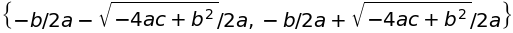

In [ ]:
sym.solveset(a * x ** 2 + b * x + c, x)

---
**Ćwiczenie** Użyj SymPy do wyznaczenia rozwiązania równania stopnia trzeciego:

$$a x ^ 3 + b x ^ 2 + c  x + d = 0$$

---

Metoda `solveset` może przyjąć więcej argumentów, na przykład ogranmiczenia przestrzeni rozwiązań. Na przykład poniższe równanie w zbiorze $\mathbb{R}$ nie ma rozwiązań:

$$x^2 + 1 = 0$$

In [ ]:
sym.solveset(x ** 2 + 1, x, domain=sym.S.Reals)

---
**Ćwiczenie** Wykorzystaj SymPy do rozwiązania poniższych równań:

- $x ^ 2 == 2$ w zbiorze $\mathbb{N}$;
- $x ^ 3 + 2 x = 0$ w zbiorze $\mathbb{R}$.

---

## Analiza matematyczna

Obliczanie granicy funkcji, np.:

$$\lim_{x\to 0^+}\frac{1}{x}$$

In [ ]:
sym.limit(1/x, x, 0, dir="+")

---
**Ćwiczenie** Oblicz granice:

1. $\lim_{x\to 0^-}\frac{1}{x}$
2.  $\lim_{x\to 0}\frac{1}{x^2}$

---

Obliczanie pochodnych, np.:

$$x ^ 2 - \cos(x)$$

In [ ]:
sym.diff(x ** 2 - sym.cos(x), x)

Obliczanie całek nieoznaczonych, np. $∫x^2-\cos x\;dx$:

In [ ]:
sym.integrate(x ** 2 - sym.cos(x), x)

Obliczanie całek oznaczonych, np. $$∫_{0}^{5}  x^2-\cos x\;dx$$

In [ ]:
wynik = sym.integrate(x ** 2 - sym.cos(x), (x, 0, 5))
wynik

In [ ]:
float(wynik)

---

**Ćwiczenie** Użyj SymPy do obliczenia:

1. $\frac{d\sin(x ^2)}{dx}$
2. $\frac{d(x ^2 + xy - \ln(y))}{dy}$
3. $\int e^x \cos(x)\;dx$
4. $\int_0^5 e^{2x}\;dx$

## Wykresy z SymPy

SymPy może posłużyć do wykreślania funkcji (razem z [matplotlib](http://matplotlib.org/)). 

Przed uruchomieniem kreślenia w Jupyter notebook, trzeba wydać czarodziejską komendę:

In [ ]:
%matplotlib inline

Parabola $x^2$:

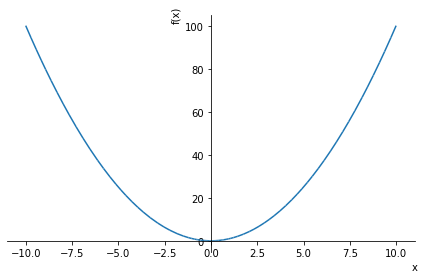

In [ ]:
expr = x ** 2
p = sym.plot(expr);

---
**Ćwiczenie** Narysuj wykresy funkcji:

- $y=x + cos(x)$
- $y=x ^ 2 - e^x$ (być może przyda się `ylim` jako argument)

Eksperymentuj z wykresami.

## Wykresy - jak to zrobić

Wykrs dla danych próbkowanych (`numpy` - numeryczny python, `linspace` - próbkowanie wartości z podanego zakresu).

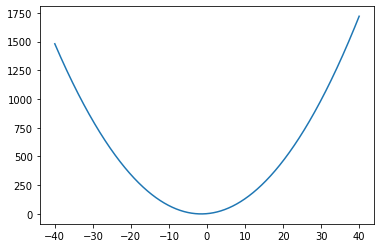

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-40, 40, 1000)
y = x ** 2 + 3 * x + 1
plt.figure()
plt.plot(x, y);

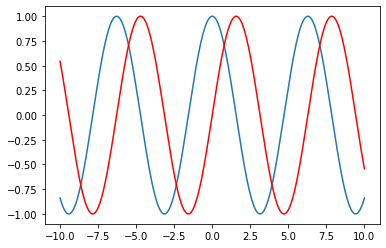

In [ ]:
# nakładanie wykresów
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 1000)
f = np.cos(x)
g = np.sin(x)
plt.figure()
plt.plot(x, f)
plt.plot(x, g, color="red");

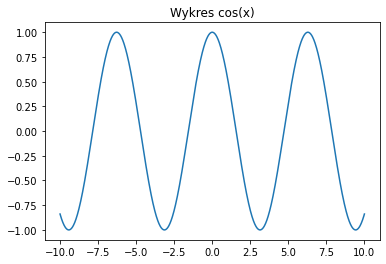

In [ ]:
# dodawanie tytułu
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 1000)
f = np.cos(x)
plt.figure()
plt.plot(x, f)
plt.title("Wykres cos(x)");

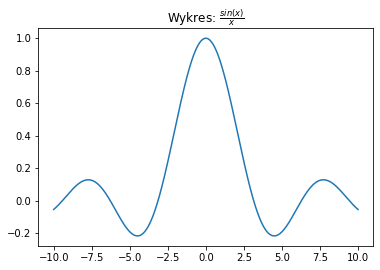

In [ ]:
# uzywanie LaTeX w opisach
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 1000)
f = np.sin(x)/x
plt.figure()
plt.plot(x, f)
plt.title("Wykres: $\\frac{sin(x)}{x}$");

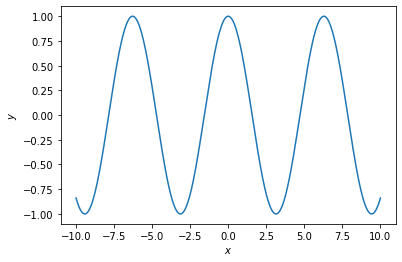

In [ ]:
# nazwy osi
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 1000)
f = np.cos(x)
plt.figure()
plt.plot(x, f)
plt.xlabel("$x$")
plt.ylabel("$y$");

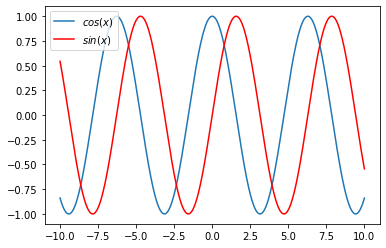

In [ ]:
# dodawanie legendy
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 1000)
f = np.cos(x)
g = np.sin(x)
plt.figure()
plt.plot(x, f, label="$cos(x)$")
plt.plot(x, g, label="$sin(x)$", color="red")
plt.legend();

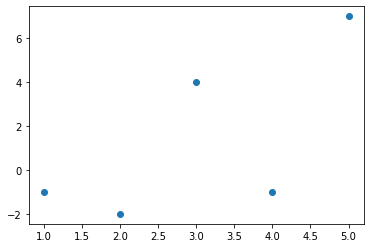

In [ ]:
# dane empiryczne
import matplotlib.pyplot as plt
import numpy as np

x = np.array((1, 2, 3, 4, 5))
y = np.array((-1, -2, 4, -1, 7))
plt.figure()
plt.scatter(x, y)
plt.show()